In [2]:
import numpy as np
import pandas as pd
import math
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsRegressor

import matplotlib.pyplot as plt

In [3]:
team_df = pd.read_csv('/home/mloomis1/scratch/archive/team.csv')
pitching_df = pd.read_csv('/home/mloomis1/scratch/archive/pitching.csv')

**Cleaning and Normalizing Data**

In [4]:
cleaned_years = team_df[team_df.year >= 1947]



cleaned_team = cleaned_years[['g', 'w', 'so', 'bb', 'er', 'hr', 'h', 'hbp', 'ipouts']]
cleaned_team = cleaned_team.dropna()

cleaned_team["so"] = cleaned_team["so"] / cleaned_team["ipouts"]
cleaned_team["bb"] = cleaned_team["bb"] / cleaned_team["ipouts"]
cleaned_team["hr"] = cleaned_team["hr"] / cleaned_team["ipouts"]
cleaned_team["er"] = cleaned_team["er"] / cleaned_team["ipouts"]
cleaned_team["h"] = cleaned_team["h"] / cleaned_team["ipouts"]
cleaned_team["hbp"] = cleaned_team["hbp"] / cleaned_team["ipouts"]
cleaned_team["win_perc"] = 1 - cleaned_team["w"] / cleaned_team["g"]
                                        

#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

pitcher_stats = ['bb', 'h', 'er', 'so', 'hbp']
b = cleaned_team[['win_perc']]
a = cleaned_team[pitcher_stats]
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.25, random_state=0)
#print(a)
#print(b)

**Running Liner Regression and Getting Weights**

In [5]:
reg = LinearRegression().fit(a_train, b_train)
linreg_acc = reg.score(a_test, b_test)
print(linreg_acc)
#print('"Accuracy" is', lr_acc, '\n\n')

# we can use ALL of the data to create a regression, because we'll be "testing" not on these teams, but on players instead
true_reg = LinearRegression().fit(a, b)

print("Weights:")
print(tuple(zip(true_reg.coef_[0], pitcher_stats)))
print("Intercept:" + str(true_reg.intercept_))

0.7708121463950757
Weights:
((-1.2742169737281102, 'bb'), (-1.8810563488388519, 'h'), (3.0065528525233347, 'er'), (0.00611754543757298, 'so'), (-2.6774475619957556, 'hbp'))
Intercept:[0.84305145]


**Linear Regression Plot**

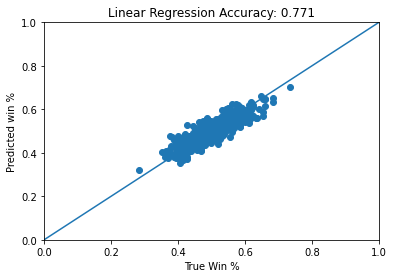

In [6]:
fig, ax = plt.subplots()

prediction = []
for i, pitcher_stats in a.iterrows():
    prediction.append(true_reg.predict([pitcher_stats]))

ax.plot([0,1],[0,1], transform=ax.transAxes)
    
plt.scatter(b, prediction)
plt.title('Linear Regression Accuracy: %.3f' % linreg_acc)
plt.xlabel('True Win %')
plt.ylabel('Predicted win %')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.show()

**Random Forest**

In [9]:
forest_regr = RandomForestRegressor(max_depth=100, random_state=1)
forest_regr.fit(a_train, b_train)
forest_acc = forest_regr.score(a_test, b_test)

print('"Accuracy" is', forest_acc, '\n\n')

true_forest_regr = RandomForestRegressor(max_depth=100, random_state=0)
true_forest_regr.fit(a, b)

<ipython-input-9-485b29a791d9>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_regr.fit(a_train, b_train)
<ipython-input-9-485b29a791d9>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  true_forest_regr.fit(a, b)


"Accuracy" is 0.7160030214186723 




RandomForestRegressor(max_depth=100, random_state=0)

2775


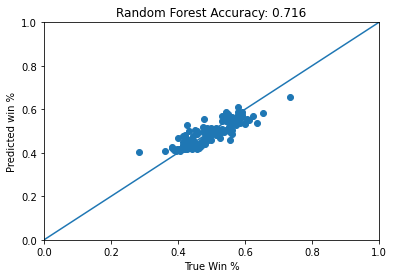

In [12]:
fig, ax = plt.subplots()

forest_pred_X = []
for i, stats in a_test.iterrows():
    forest_pred_X.append(forest_regr.predict([stats]))

print(i)
ax.plot([0,1],[0,1], transform=ax.transAxes)

plt.scatter(b_test, forest_pred_X)
plt.title('Random Forest Accuracy: %.3f' % forest_acc)
plt.xlabel('True Win %')
plt.ylabel('Predicted win %')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.show()
